# Contours

* Using findContours
* Drawing Contours
* Hierarchy of Contours
* Contouring Modes (Simple vs Approx) 

#### Define libraries / functions

In [1]:
# Set up
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Define imshow
def imshow(title = "Image", image = None, size = 10):
  w,h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

##### Get Images

In [2]:
#Download and unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-08-29 14:54:50--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.86
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  20.2MB/s    in 1.4s    

2022-08-29 14:54:52 (20.2 MB/s) - ‘images.zip’ saved [29586716/29586716]



# What are Contours?

* Contours are continuous lines or curves that bound or cover the full boundry of an object

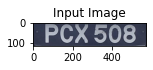

In [3]:
image = cv2.imread('images/LP.jpg')
imshow('Input Image', image)

#### Applying Contour
cv2.findContours(image, Retrival Mode, Approximation Method)


**Retrival Mode**

* RETR_LIST - retrives all contours, but doesn't create parent-child relationship. Parents and Kids are all equal in this rule and they are just contours, i.e. They belong to same hierarchy level

* RETR_EXTERNAL - returns only extreme outer flags. All child contours are left behind

* RETR_CCOMP - This flag retrives all contours and arranges them to a level 2 hierarchy. External Contours of the objects are placed in hierarchy - 1. Contours inside the objects are placed in hierarchy - 2. If there are any object inside it, it is placed again in heirarchy 1 and it's hole in heirarchy 2 and so on

* RETR_TREE - It retrives all the contours and creates a full family hieratchy list

**Approximation Method**

* cv2.CHAIN_APPROX_NONE - Stores all the points along the line (inefficient)

* cv2.CHAIN_APPROX_SIMPLE - Stores the end points of each line

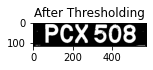

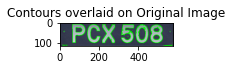

Number of Contours found = 38


In [4]:
image = cv2.imread('images/LP.jpg')

#convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After Thresholding', th2)

#Finding Contours
#Use a copy of image (eg edged.copy()), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

#Draw all contours, this overwrites the input image (inplace operation)
#Use -1 as third parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on Original Image', image)

print("Number of Contours found = " + str(len(contours)))

#### Using Canny Edges instead of Thresholding

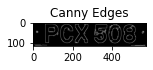

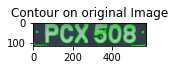

No. of contours found = 77


In [5]:
image = cv2.imread('images/LP.jpg')

#convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#canny edges
edged = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edged)

#Finding Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

#Draw all contours
#Use -1 as 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contour on original Image', image)

print("No. of contours found = " + str(len(contours)))

# Retreival Modes

**Hierarchy**
This array stores 4 Values for each contour

* First Term is the index of **Next contour**
* Second Term is the index of **Previous contour**
* Third Term is the index of **Parent Contour**
* Fourth Term is the index of **Child Contour** 

#### RETR_LIST
* Retrives all contours, doesn't care about hierarchy

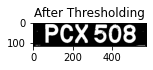

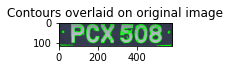

Number of Contours =77
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [38 36 -1 -1]
  [39 37 -1 -1]
  [40 38 -1 -1]
  [41 39 -1 -1]
  [42 40 -1 -1]
  [43 41 -1 -1]
  [44 42 -1 -1]
  [45 43 -1 -1]
  [46 44 -1 -1]
  [47 45 -1 -1]
  [48 46 -1 -1]
  [49 47 -1 -1]
  [50 48 -1 -1]
  [51 49 -1 -1]
  [52 50 -1 -1]
  [53 51 -1 -1]
  [54 52 -1 -1]
  [55 53 -1 -1]
  [56 54 -1 -1]
  [57 55 -1 -1]
  [58 56 -1 -1]
  [59 57 -1 -1]
  [60 58 -1 -1]
  [61 59 -1 -1]
 

In [6]:
image = cv2.imread('images/LP.jpg')

#Convert to GrayScale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After Thresholding', th2)

#Using copy as changes alter the image
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours ="+ str(len(contours)))
print(hierarchy)

#### RETR_EXTERNAL
Returns only extreme outer flags, all child contours are left behind

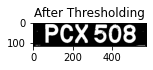

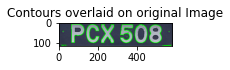

Number of Contours =16
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [-1 14 -1 -1]]]


In [7]:
image = cv2.imread('images/LP.jpg')

#convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After Thresholding',th2)

#via image copy
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original Image', image, size = 10)

print("Number of Contours =" + str(len(contours)))
print(hierarchy)

#### RETR_CCOMP
* Retrieves 2 Level hierarchy

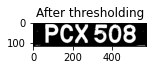

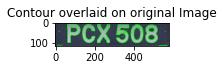

Number of Contours found = 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [8]:
image = cv2.imread('images/LP.jpg')

#Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

#Use copy of image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

#draw contours
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contour overlaid on original Image', image)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

# Contouring Modes

* CHAIN_APPROX_NONE

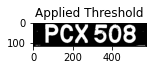

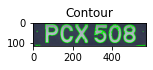

Number of Contours = 38
87
50
7
1
1
1
1
4
2
1
236
80
6
75
10
4
8
426
6
4
4
10
14
21
17
241
6
14
15
155
14
9
358
4
4
347
272
92


In [9]:
image = cv2.imread('images/LP.jpg')

#Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Applied Threshold", th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow("Contour", image)

print("Number of Contours = " + str(len(contours)))
for c in contours:
  print(len(c))

# CHAIN_APPROX_SIMPLE

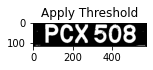

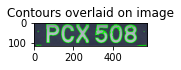

Number of contours found = 38
8
10
7
1
1
1
1
4
2
1
114
40
6
37
6
4
8
172
6
4
4
6
6
15
11
121
6
6
8
57
8
7
170
4
4
164
65
27


In [10]:
image = cv2.imread('images/LP.jpg')

#convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Apply Threshold", th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on image', image)

print("Number of contours found = " + str(len(contours)))
for c in contours:
  print(len(c))

# Moments, Sorting, Approximating & Matching Contours

* Sorting contours by area
* Sort by Left to Right (Good for OCR)
* Approximate Contours
* Convex Hull

#### Finding contours using the normal method

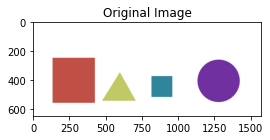

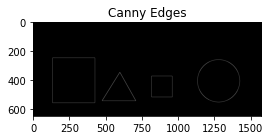

Number of contours found 4


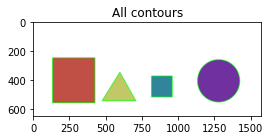

In [11]:
#load Image
image = cv2.imread('images/bunchofshapes.jpg')
imshow('Original Image', image)

#Grayscale Image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Find Canny Edges
edged = cv2.Canny(gray, 50, 200)
imshow('Canny Edges', edged)

#Find Contours
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print('Number of contours found', len(contours))

#Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
imshow('All contours', image)

#### Sorting Area by Using cv2.ContourArea and cv2.Moments

In [12]:
import cv2
import numpy as np

In [13]:
#Function to display contour area

def get_contour_areas(contours):
  """ returns the areas of all contours as list """
  all_areas = []
  for cnt in contours:
    area = cv2.contourArea(cnt)
    all_areas.append(area)
  return all_areas

Contour Area before Sorting...
[20587.5, 22901.5, 66579.5, 90222.0]
Contour areas after sorting...
[20587.5, 22901.5, 66579.5, 90222.0]


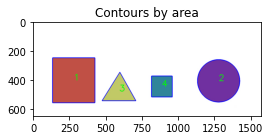

In [14]:
#Load Image
image = cv2.imread('images/bunchofshapes.jpg')

#Print the area of Contours before sorting
print("Contour Area before Sorting...")
print(get_contour_areas(contours))

#sort contour by large to small areas
sorted_contours = sorted(contours, key = cv2.contourArea, reverse = True)

print("Contour areas after sorting...")
print(get_contour_areas(contours))

#Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow('Contours by area', image)

#### Useful Functions

In [15]:
#Functions to sort by positions
def x_cord_contour(contours):
  """ Returns X cordinate for the contour centroid """
  if cv2.contourArea(contours) > 18:
    M = cv2.moments(contours)
    return (int(M['m10'] / M['m00']))
  else:
    pass

def label_contour_center(image, c):
  """ Place a red circle on the center of contours """
  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  #Draw the contour number of the image
  cv2.circle(image, (cx,cy), 10, (0,0,255), -1)
  return image

#### Using Moments to calculate the center and then use X Cordinate to sort from left to right

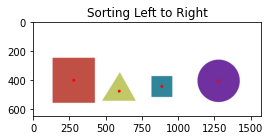

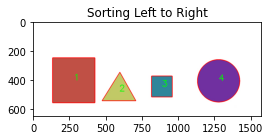

In [16]:
#load image
image = cv2.imread('images/bunchofshapes.jpg')
original_image = image.copy()

#Compute Center of Mass or Centroid and Drawing them on image
for (i,c) in enumerate(contours):
  orig = label_contour_center(image, c)

#Showing the contour center
imshow("Sorting Left to Right", image)

#Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

#Labelling Contours left to right
for (i, c) in enumerate(contours_left_to_right):
  cv2.drawContours(original_image, [c], -1, (0,0,255), 3)
  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  cv2.putText(original_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
  (x,y,w,h) = cv2.boundingRect(c)

imshow('Sorting Left to Right', original_image)

# Approximating Contours using ApproxPolyDP

**Using ApproxPolyDP to approximate contours as a more defined Shape**

It approximates contour shape to another shape with less number of vertices depending upon the precision we specify

cv2.approxPolyDP(contour, Approximation Accuracy, Closed)

* **Contour** - is the individual contour we wish to approximate
* **Approximation Accuracy** - Important parameter is determining the accuracy of the approximation. Small value gives precise approximations, large value gives more generic approximations. A good rule of thumb is less than 5% of the contour perimeter

* **Closed** - A Boolean Value that states whether the approximate contour should be open or closed

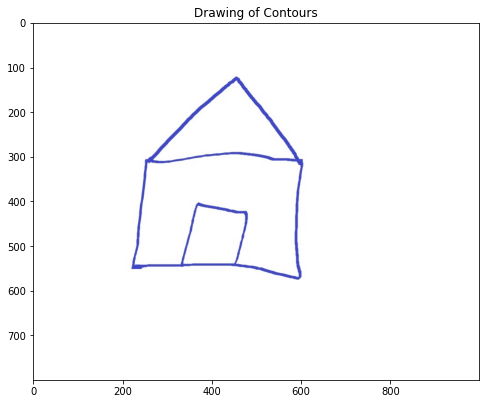

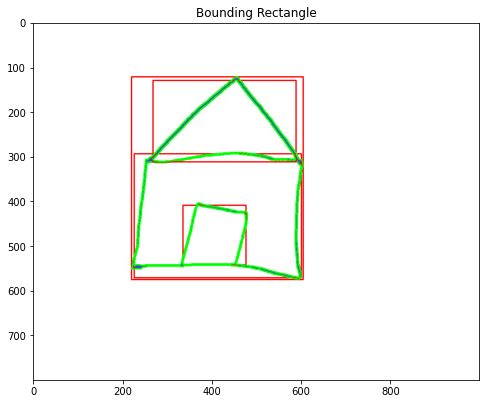

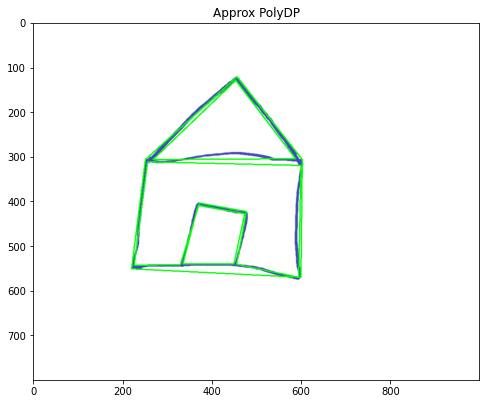

In [20]:
import numpy as np
import cv2

#load image
image = cv2.imread('images/house.jpg')
orig_image = image.copy()

#Grayscale and Binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

#find Contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

#iterate through each contour
for c in contours:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(orig_image, (x,y), (x+w, y+h), (0, 0, 255), 2)
  cv2.drawContours(orig_image, [c], 0, (0, 255, 0), 2)

imshow('Drawing of Contours', image)
imshow('Bounding Rectangle', orig_image)

#Iterate through each contour
for c in contours:
  #Calculate accuracy as a percent of Contour perimeter
  accuracy = 0.03 * cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, accuracy, True)
  cv2.drawContours(copy, [approx], 0, (0, 255, 0), 2)

imshow('Approx PolyDP', copy)

# Convex Hull

* May look similar to Contour Approximation but it is not.

The cv2.ConvexHull() functions checks for curve for convexiry defects and corrects it. 

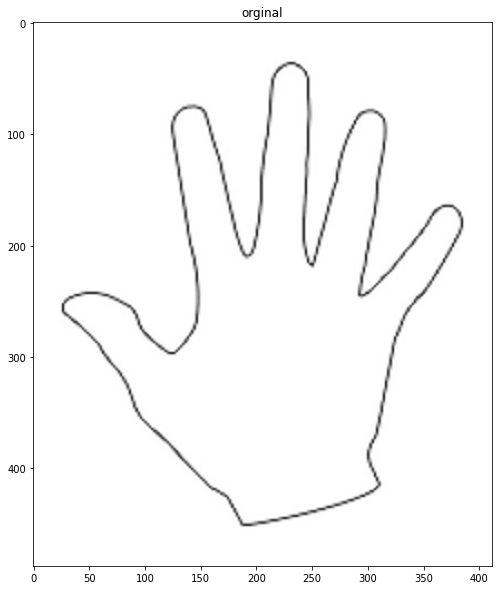

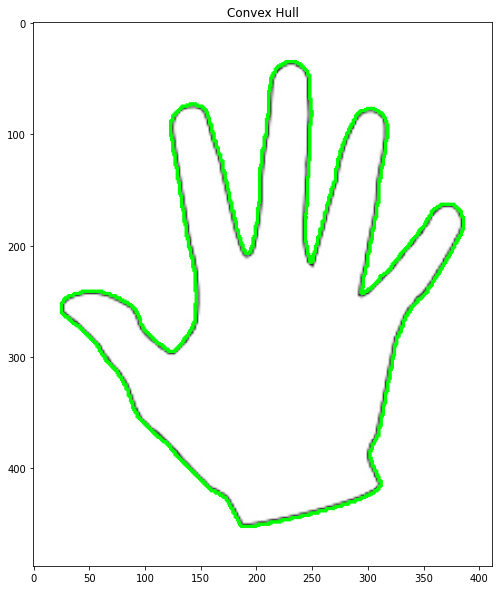

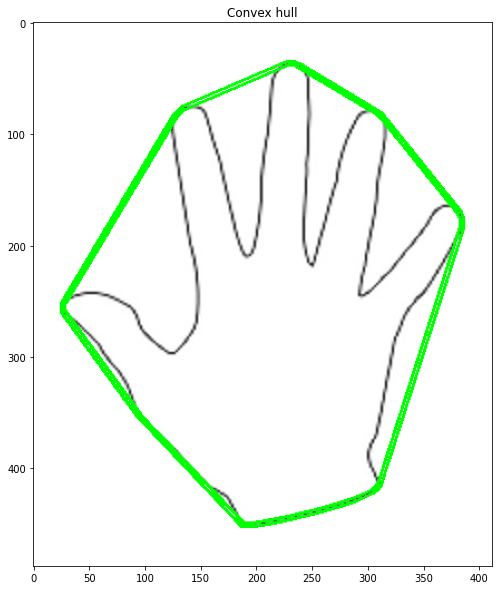

In [22]:
import numpy as np
import cv2

image = cv2.imread('images/hand.jpg')
original_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow('orginal', image)

#Threshold Image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

#Find Contours
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, [c], 0, (0,255,0), 2)
imshow('Convex Hull', image)

#Sort Contour by Area and rhen remove largest contour
n = len(contours) - 1 #remove largest
contours = sorted(contours, key = cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
  hull = cv2.convexHull(c)
  cv2.drawContours(original_image, [hull], 0, (0,255,0), 2)

imshow('Convex hull', original_image)


# Matching Shapes

cv2.matchShapes(contour template, contour, method, method parameter)

Output = match value (lower value means closer match)

* Contour Template - This is reference Contour we are trying to find in the new image

* Contour - The individual Contour we are checking against

* Method - Type of Contour Matching (1,2,3)

* Method Parameter - leave alone as 0,0 (Not fully utilized in OpenCV)

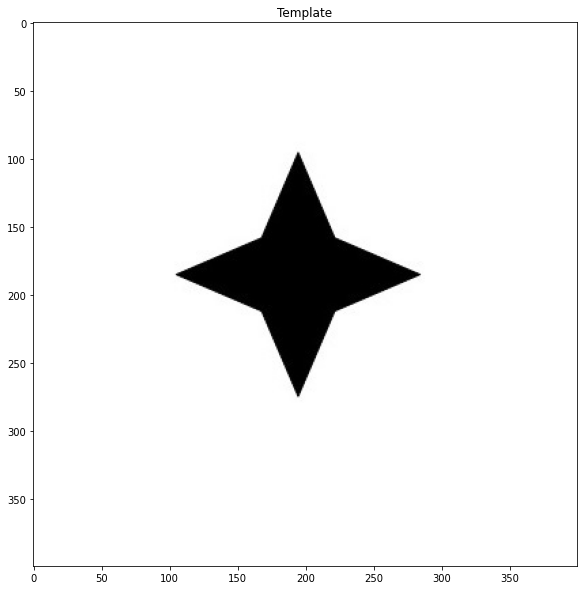

0.13081816783853514
0.15902005339788694
0.14987915682525596
0.07094034474475601


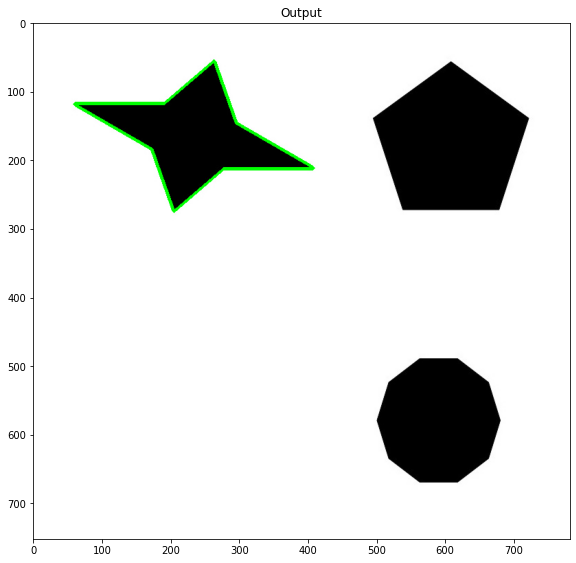

In [26]:
import cv2
import numpy as np

#load the image
template = cv2.imread('images/4star.jpg',0 )
imshow('Template', template)

#Load Target Image
target = cv2.imread('images/shapestomatch.jpg')
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

#Threshold image
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

#Find Contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

#REMOVE LARGEST
sorted_contours = sorted(contours, key=cv2.contourArea, reverse = True)

#Extract second largest value
template_contour = contours[1]

#Contours from second image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
  #iterate through each contour in target image
  #use cv2.matchShapes to compare contour shape
  match = cv2.matchShapes(template_contour, c, 3, 0.0)
  print(match)
  #If match value less than 0.15
  if match < 0.15:
    closest_contour = c
  else:
    closest_contour = []

cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
imshow('Output', target)